# Importing Libraries

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.metrics import silhouette_samples, silhouette_score



==========================================================================================================================

# Importing & Reading Data

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [5]:
df.tail()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Category 1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Category 4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Category 6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Category 6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Category 4,B


In [6]:
df.shape

(8068, 11)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Married', 'Age', 'Graduated', 'Profession',
       'WorkExperience', 'SpendingScore', 'FamilySize', 'Category',
       'Segmentation'],
      dtype='object')

In [8]:
df.describe()

,CustomerID,Age,WorkExperience,FamilySize
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [10]:
df.isna().sum()

CustomerID          0
Gender              0
Married           140
Age                 0
Graduated          78
Profession        124
WorkExperience    829
SpendingScore       0
FamilySize        335
Category           76
Segmentation        0
dtype: int64

==========================================================================================================================

# Data Cleaning & Data Wrangling 

In [11]:
df2 = df.drop(['CustomerID','Category','Segmentation'], axis=1)
df2

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [12]:
df2['FamilySize'] = df2['FamilySize'].fillna(round(df2.FamilySize.mean()))

In [13]:
df2['WorkExperience'] = df2['WorkExperience'].fillna(round(df2.WorkExperience.mean()))

In [14]:
df2['Married'].value_counts()

Yes    4643
No     3285
Name: Married, dtype: int64

In [15]:
df2['Married'] = df2['Married'].fillna('Yes')

In [16]:
df2['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [17]:
df2['Graduated'] = df2['Graduated'].fillna('Yes')

In [18]:
df2['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [19]:
df2['Profession'] = df2['Profession'].fillna('Artist')

In [20]:
df2.isna().sum()

Gender            0
Married           0
Age               0
Graduated         0
Profession        0
WorkExperience    0
SpendingScore     0
FamilySize        0
dtype: int64

In [21]:
df2

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,3.0,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,3.0,High,6.0
...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.0,Low,7.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


========================================================================================================================

# Some Data Analysis

In [22]:
df2['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

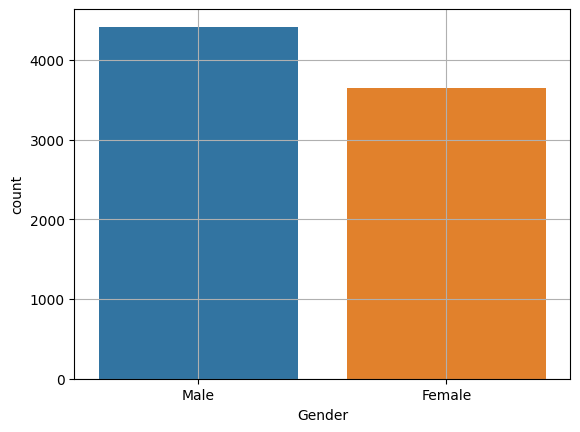

In [23]:
with plt.style.context('default'):
 sns.countplot(x='Gender',data=df2)
 plt.grid()

In [24]:
df2['Married'].value_counts()

Yes    4783
No     3285
Name: Married, dtype: int64

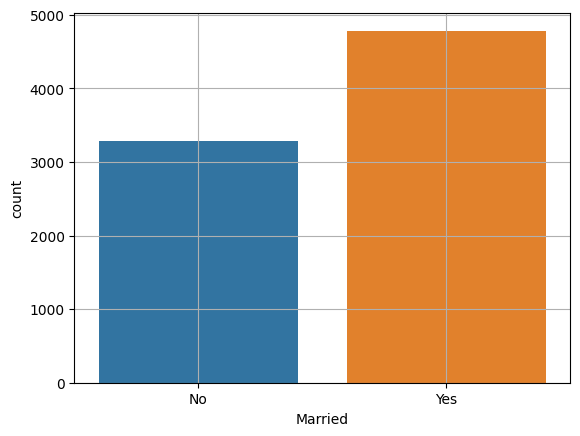

In [25]:
with plt.style.context('default'):
 sns.countplot(x='Married',data=df2)
 plt.grid()

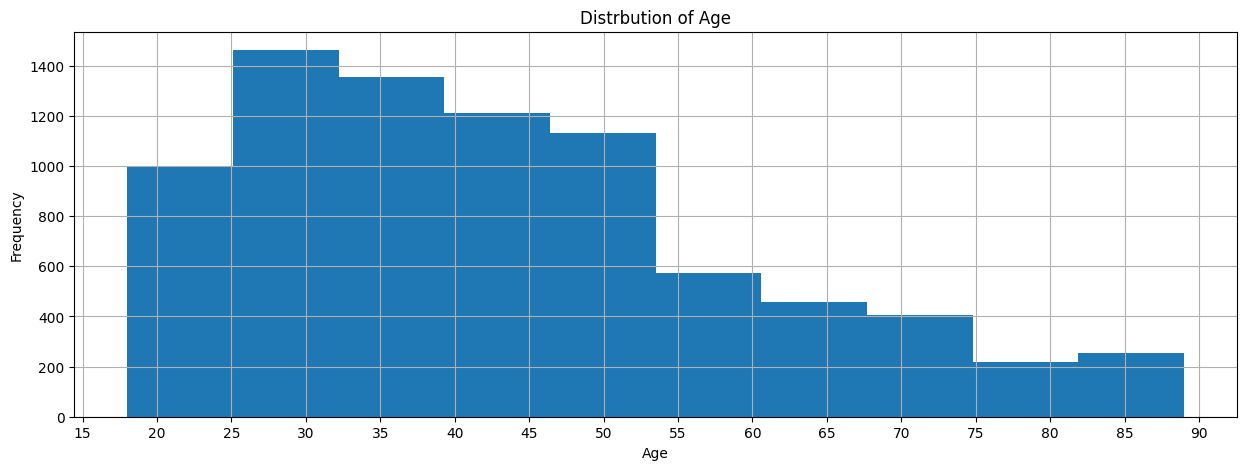

In [26]:
with plt.style.context('default'):
    bins = range(15,100,5)
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Age")
    plt.xticks(bins)
    plt.ylabel("Frequency")
    plt.title("Distrbution of Age")
    plt.hist(df['Age'])
    plt.grid()
    plt.show()

In [27]:
df2['Graduated'].value_counts()

Yes    5046
No     3022
Name: Graduated, dtype: int64

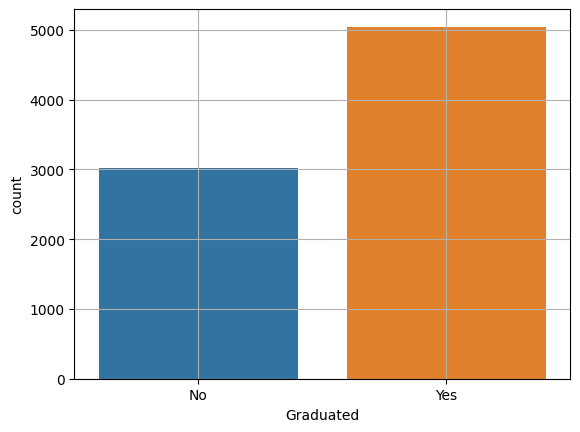

In [28]:
with plt.style.context('default'):
 sns.countplot(x='Graduated',data=df2)
 plt.grid()

In [29]:
df2['Profession'].value_counts()

Artist           2640
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [30]:
profession_dict = df2['Profession'].value_counts().to_dict()
job = list(profession_dict.keys())
values = list(profession_dict.values())

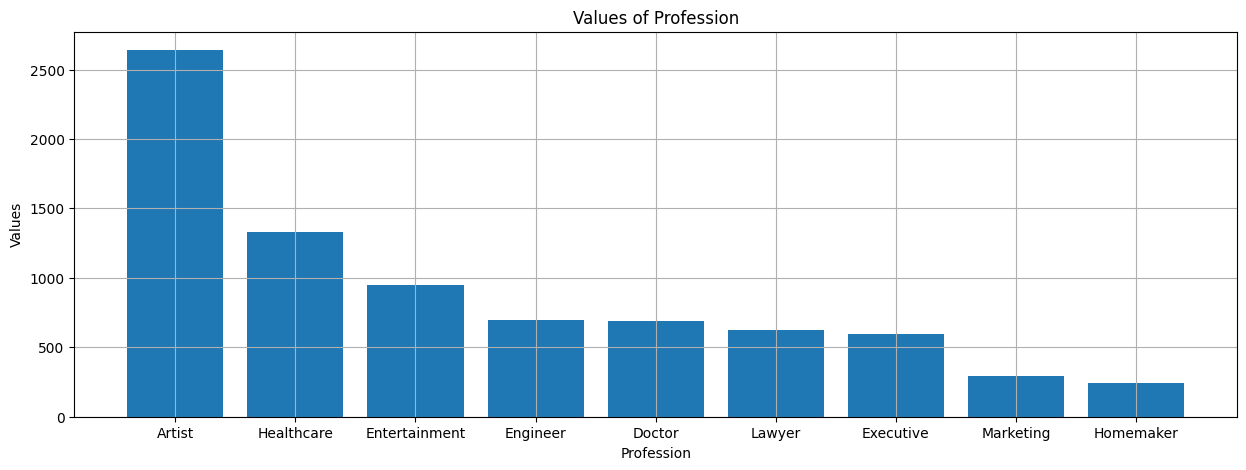

In [31]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Profession")
    plt.ylabel("Values")
    plt.title("Values of Profession")
    plt.bar(job,values)
    plt.grid()
    plt.show()

In [32]:
df2['SpendingScore'].value_counts()

Low        4878
Average    1974
High       1216
Name: SpendingScore, dtype: int64

In [33]:
spending_dict = df2['SpendingScore'].value_counts().to_dict()
spendingscore = list(spending_dict.keys())
values1 = list(spending_dict.values())

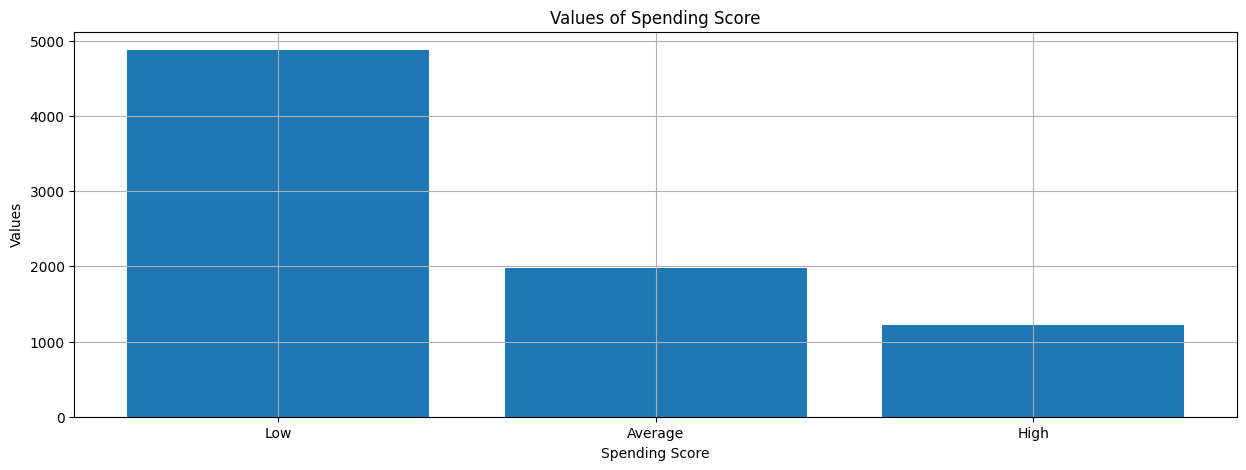

In [34]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Spending Score")
    plt.ylabel("Values")
    plt.title("Values of Spending Score")
    plt.bar(spendingscore,values1)
    plt.grid()
    plt.show()

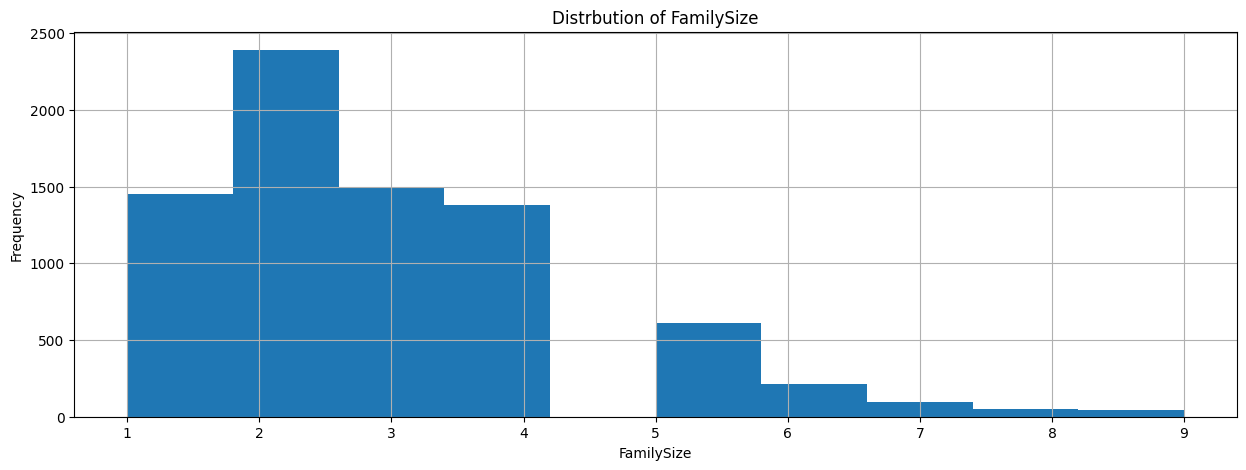

In [35]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("FamilySize")
    plt.ylabel("Frequency")
    plt.title("Distrbution of FamilySize")
    plt.hist(round(df['FamilySize']))
    plt.grid()
    plt.show()

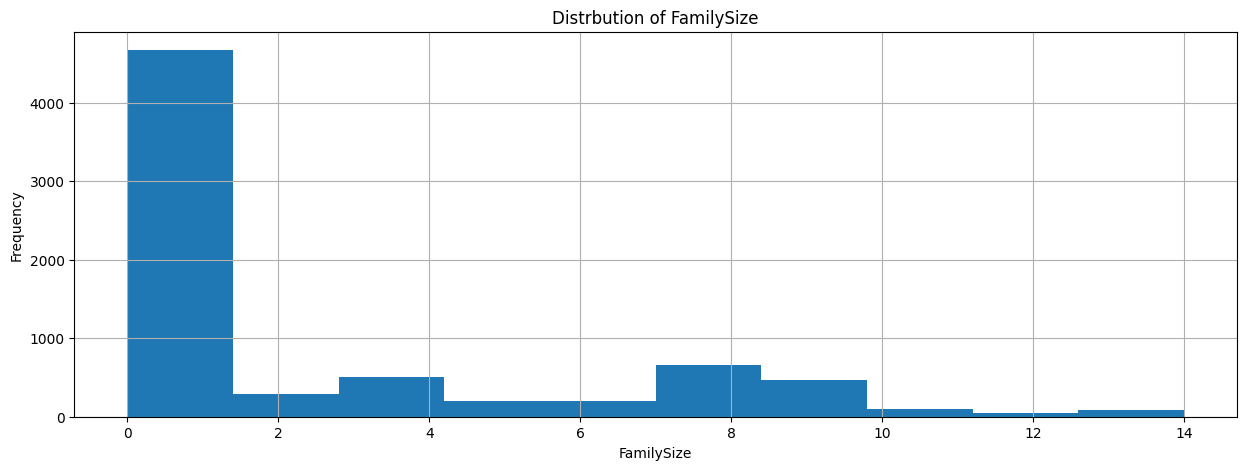

In [36]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("FamilySize")
    plt.ylabel("Frequency")
    plt.title("Distrbution of FamilySize")
    plt.hist(round(df['WorkExperience']))
    plt.grid()
    plt.show()

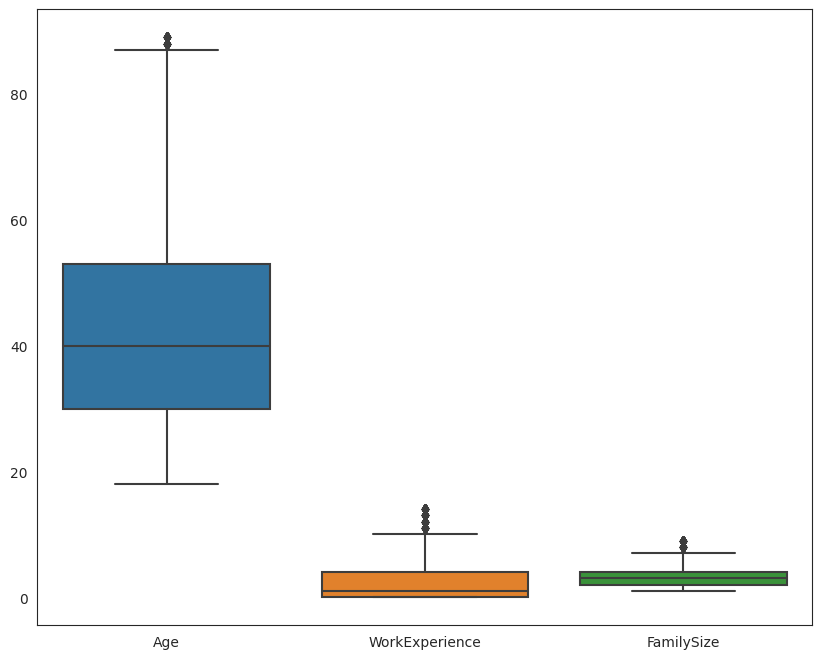

In [37]:
with plt.style.context('default'):   
    plt.figure(figsize = (10,8))
    x = sns.set_style("white")
    x = sns.boxplot(data = df2)


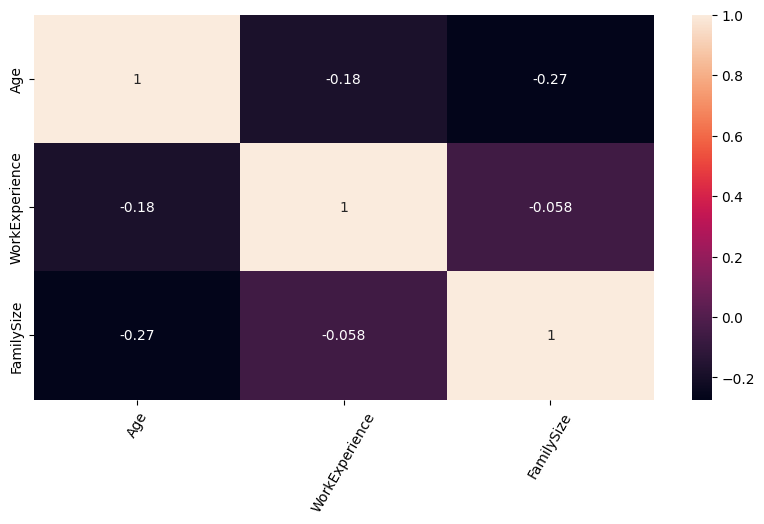

In [38]:
with plt.style.context('default'):
 fig,ax = plt.subplots(figsize=(10,5))
 sns_plot=sns.heatmap(df2.corr(),annot= True)
 plt.xticks(rotation=60)

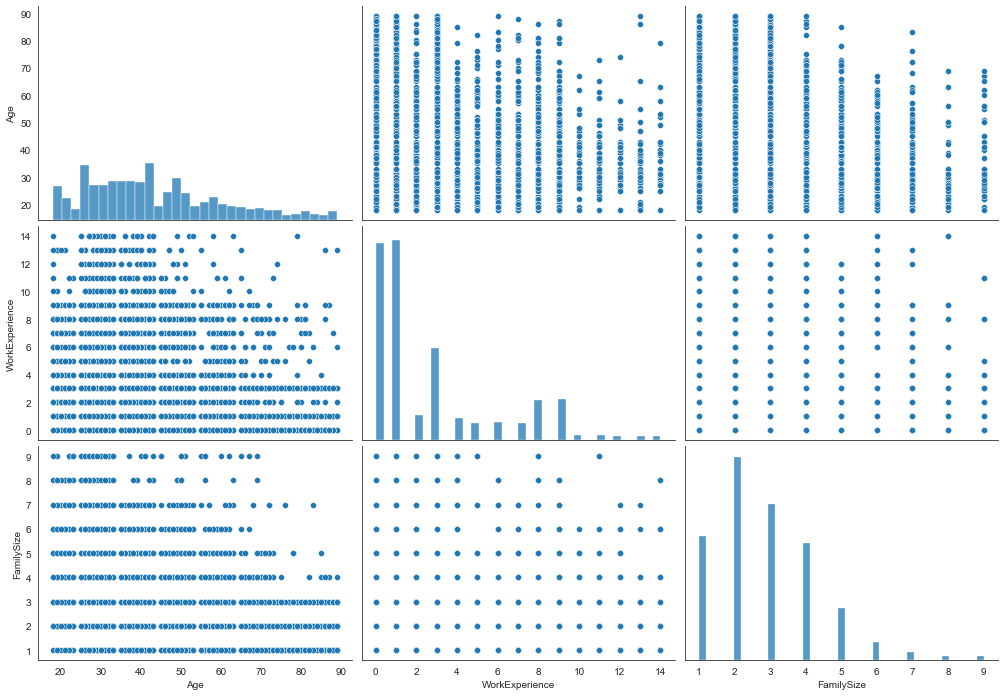

In [39]:
x = sns.set_style("white")
x = sns.pairplot(df2)
x.fig.set_size_inches(15,10)

====================================================================================================================

# Data Pre-Processing

In [40]:
df3 = pd.get_dummies(df2)
df3

,Age,WorkExperience,FamilySize,Gender_Female,Gender_Male,Married_No,Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,SpendingScore_Average,SpendingScore_High,SpendingScore_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,38,3.0,3.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,40,3.0,6.0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
8064,35,3.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
df3 = df3.drop(['Gender_Female' ,'Married_No', 'Graduated_No'],axis=1)
df3

,Age,WorkExperience,FamilySize,Gender_Male,Married_Yes,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,SpendingScore_Average,SpendingScore_High,SpendingScore_Low
0,22,1.0,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,38,3.0,3.0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
2,67,1.0,1.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
4,40,3.0,6.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8064,35,3.0,4.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
8066,27,1.0,4.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [42]:
print("Data before scalling: ")
print(np.max(df3))
print(np.min(df3))

Data before scalling: 
Age                         89.0
WorkExperience              14.0
FamilySize                   9.0
Gender_Male                  1.0
Married_Yes                  1.0
Graduated_Yes                1.0
Profession_Artist            1.0
Profession_Doctor            1.0
Profession_Engineer          1.0
Profession_Entertainment     1.0
Profession_Executive         1.0
Profession_Healthcare        1.0
Profession_Homemaker         1.0
Profession_Lawyer            1.0
Profession_Marketing         1.0
SpendingScore_Average        1.0
SpendingScore_High           1.0
SpendingScore_Low            1.0
dtype: float64
Age                         18.0
WorkExperience               0.0
FamilySize                   1.0
Gender_Male                  0.0
Married_Yes                  0.0
Graduated_Yes                0.0
Profession_Artist            0.0
Profession_Doctor            0.0
Profession_Engineer          0.0
Profession_Entertainment     0.0
Profession_Executive         0.0
Profe

In [43]:
scaler = StandardScaler()
df3 = scaler.fit_transform(df3)

print("Data after scalling: ")
print(np.max(df3))
print(np.min(df3))

Data after scalling: 
5.638860520307243
-1.5239915939029416


=============================================================================================================

# Dimensionality Reduction

In [75]:
df3_reduced = TSNE(n_components=3, learning_rate='auto',init='random').fit_transform(df3)

In [77]:
df3_reduced = pd.DataFrame(df3_reduced)

In [78]:
df3_reduced.describe()

,0,1,2
count,8068.000000,8068.000000,8068.000000
mean,0.018108,0.064955,0.405473
std,11.896473,11.811620,11.959206
min,-26.305687,-26.850285,-25.483379
25%,-8.486150,-8.791249,-8.552972
50%,-0.355333,0.279717,0.606261
75%,8.875839,8.129107,8.666624
max,28.973923,27.950354,29.193251


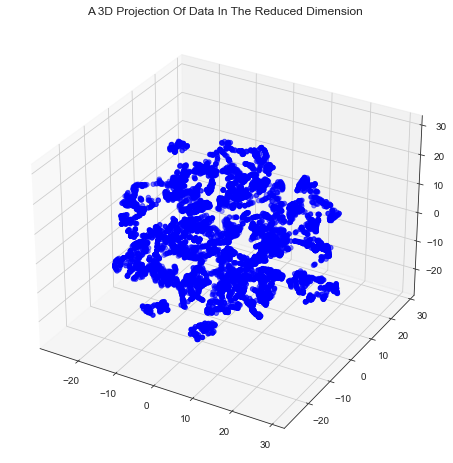

In [80]:
x =df3_reduced[0]
y =df3_reduced[1]
z =df3_reduced[2]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

=======================================================================================================================

# Elbow Method

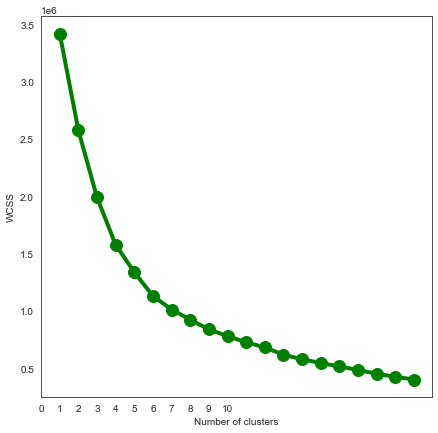

In [153]:
WCSS = []
for i in range(1,21):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(df3_reduced)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,21),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

=======================================================================================================================

# Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.05100469141182977
For n_clusters = 3 The average silhouette_score is : 0.0764862601161518
For n_clusters = 4 The average silhouette_score is : 0.03305557305015969
For n_clusters = 5 The average silhouette_score is : 0.022786832373905264
For n_clusters = 6 The average silhouette_score is : 0.05340178577871602
For n_clusters = 7 The average silhouette_score is : 0.06543417089746442
For n_clusters = 8 The average silhouette_score is : 0.03898305324690342
For n_clusters = 9 The average silhouette_score is : 0.05186944317552168
For n_clusters = 10 The average silhouette_score is : 0.05113244016109999
For n_clusters = 11 The average silhouette_score is : 0.046615711844470546
For n_clusters = 12 The average silhouette_score is : 0.08515080748046673
For n_clusters = 13 The average silhouette_score is : 0.07129688174027456
For n_clusters = 14 The average silhouette_score is : 0.08980506899991583
For n_clusters = 15 The average silhouette_sc

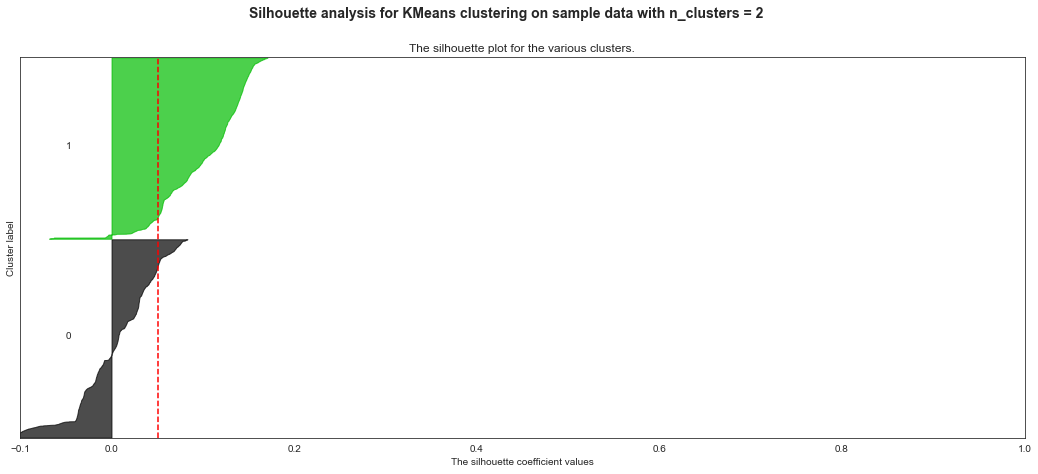

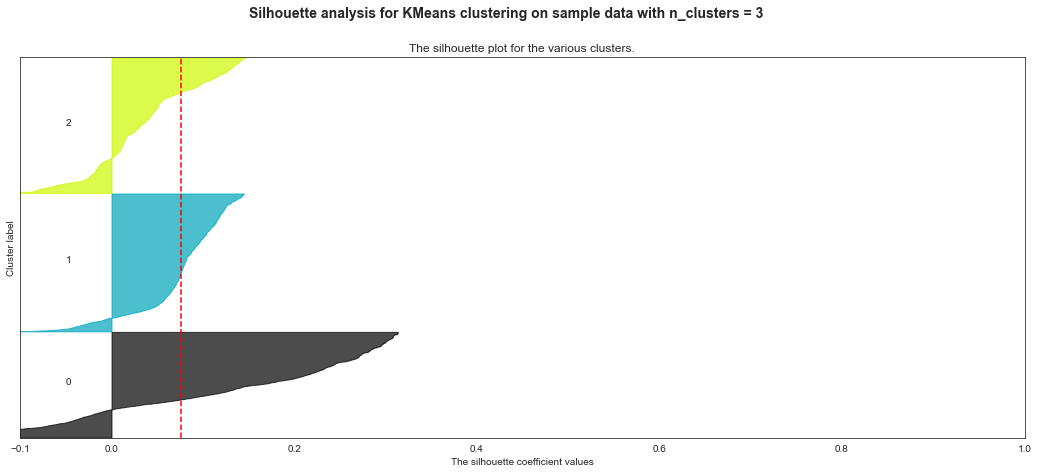

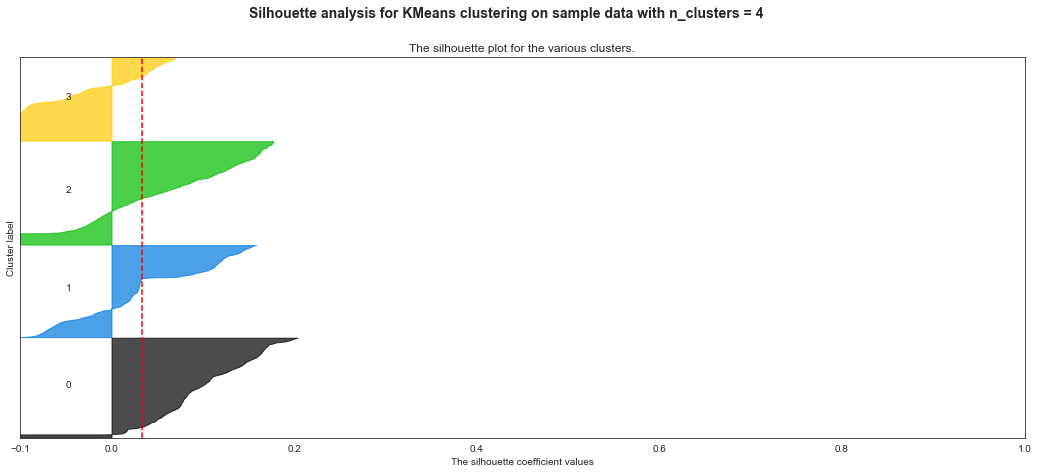

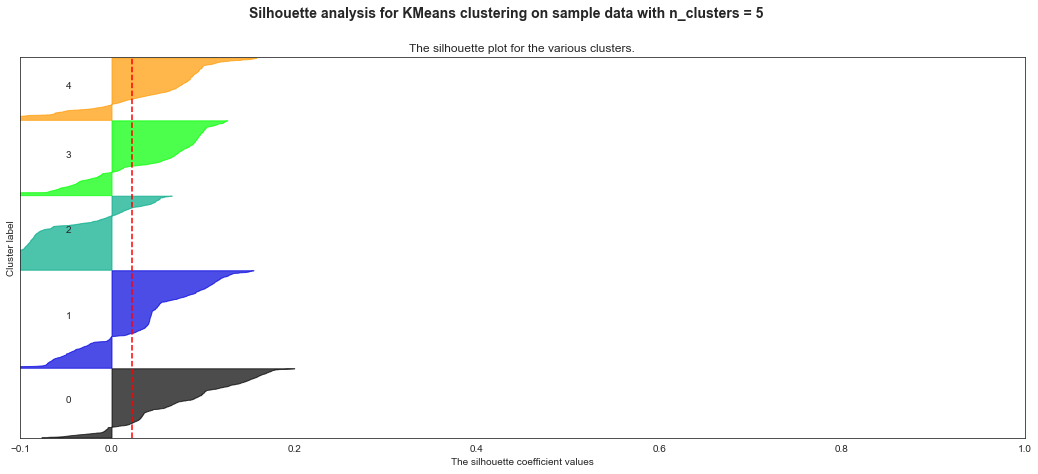

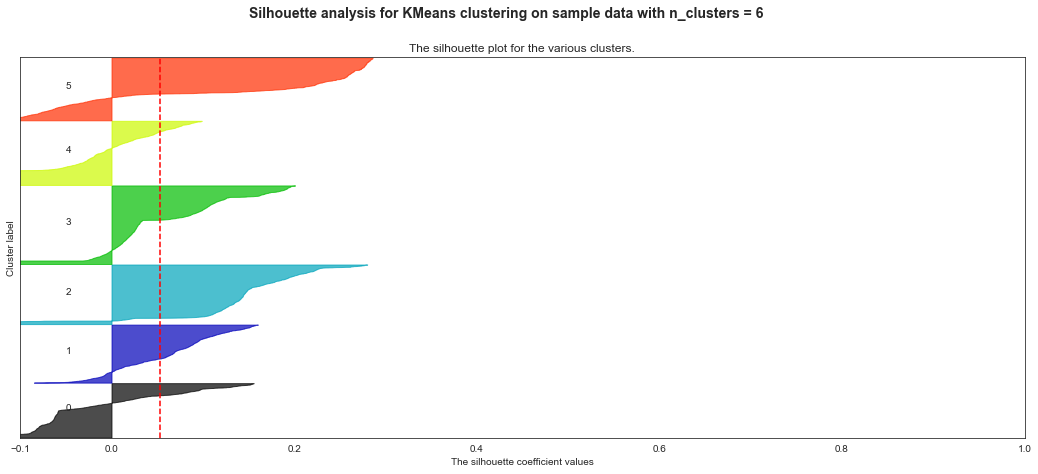

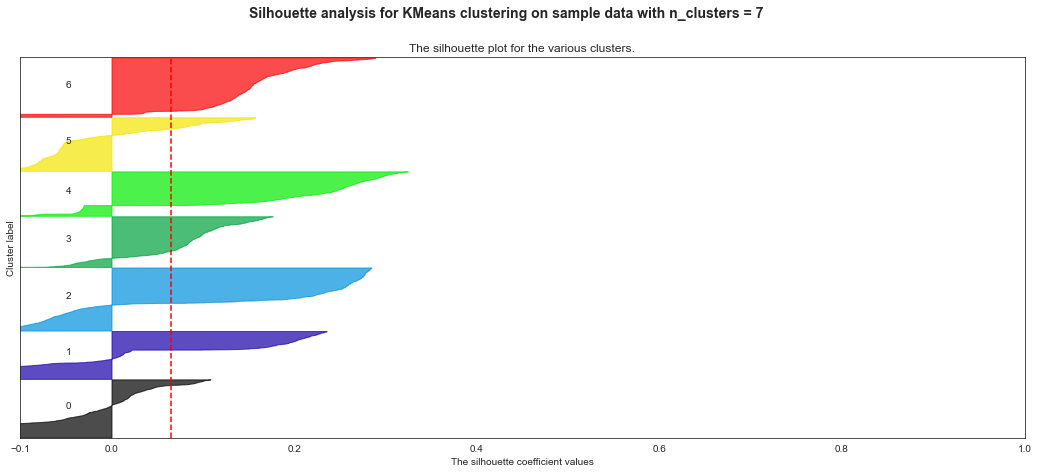

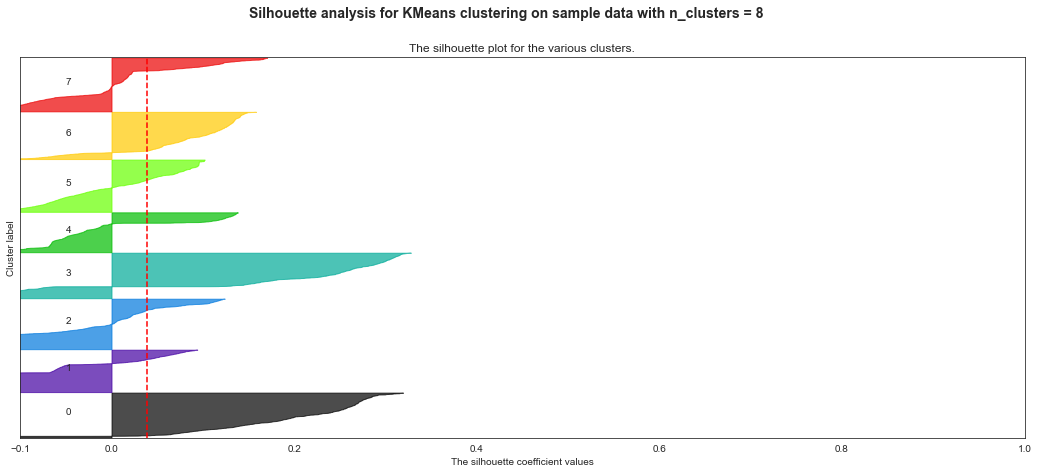

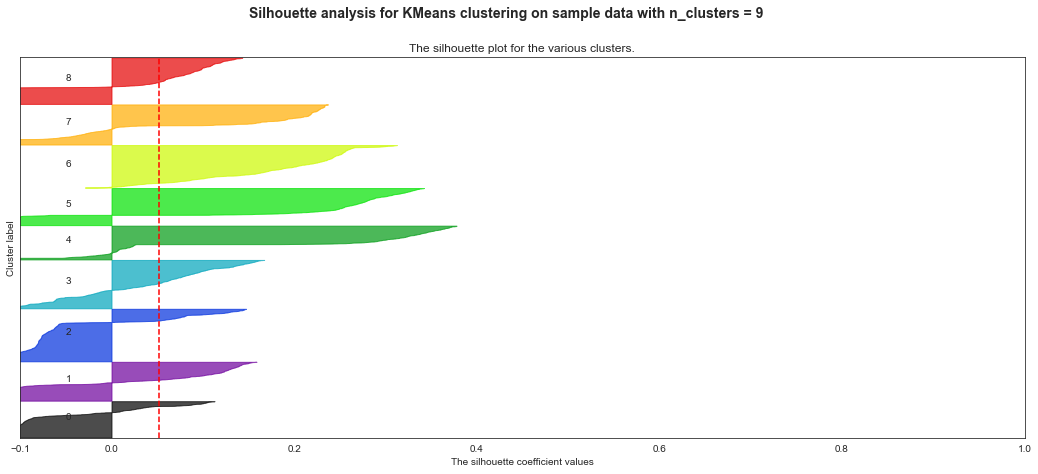

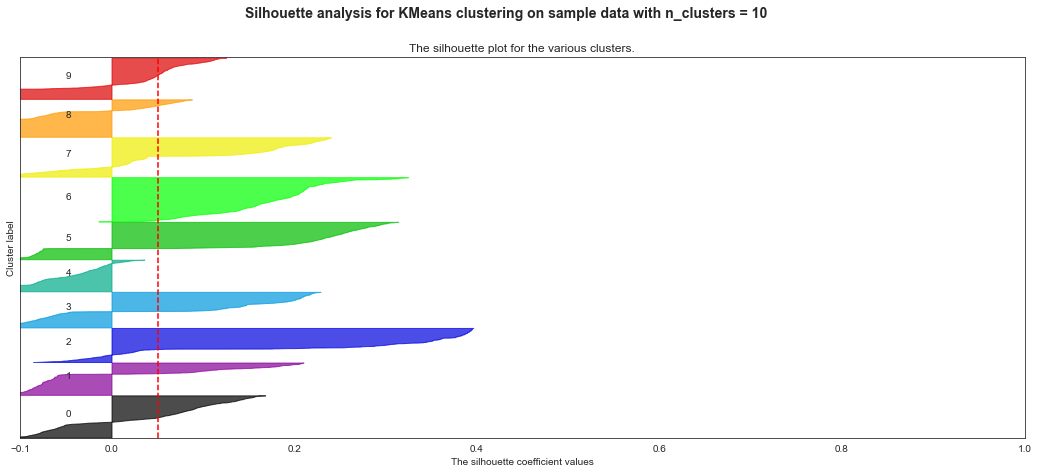

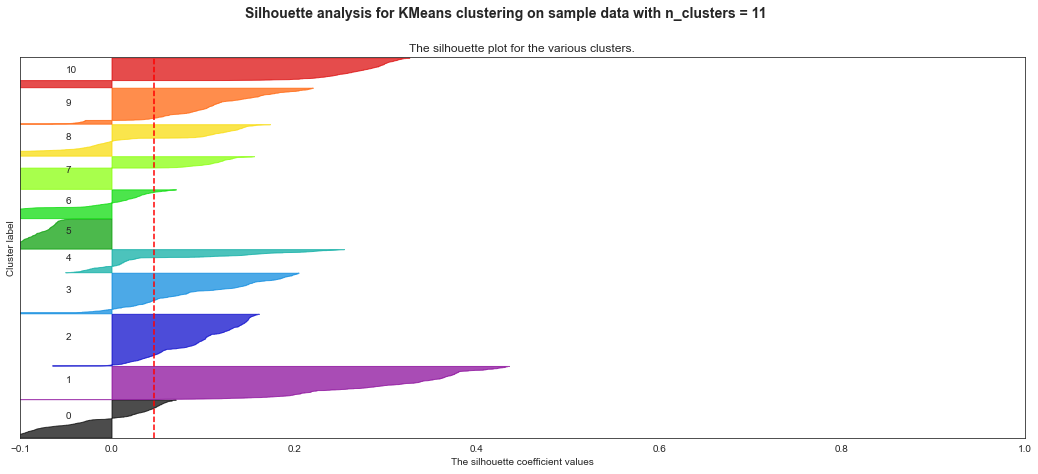

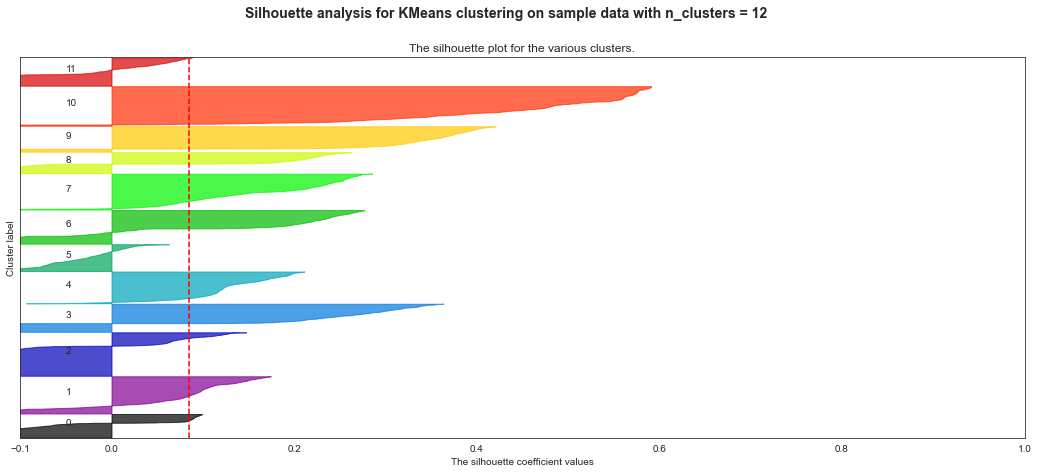

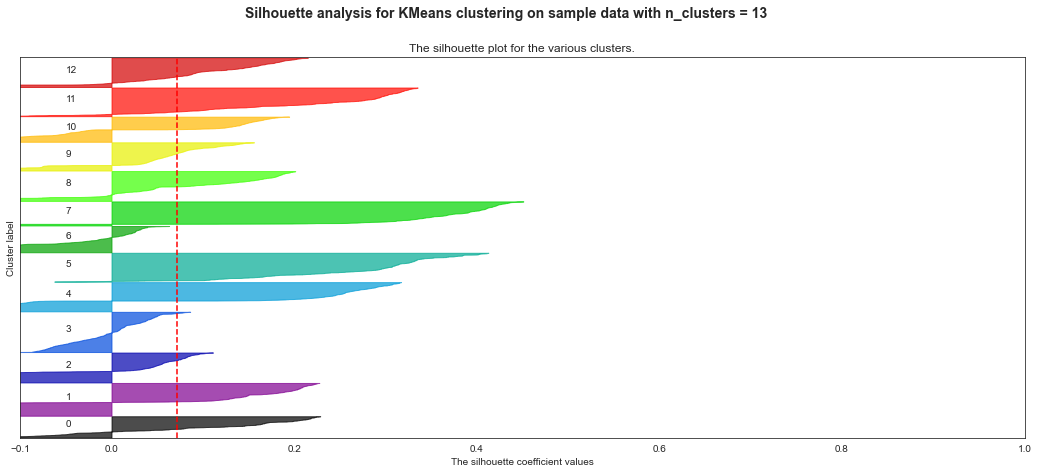

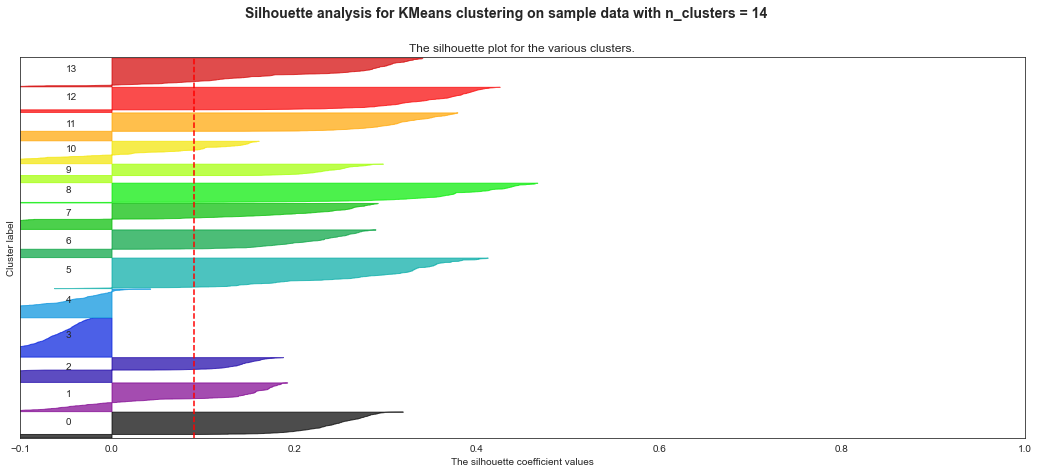

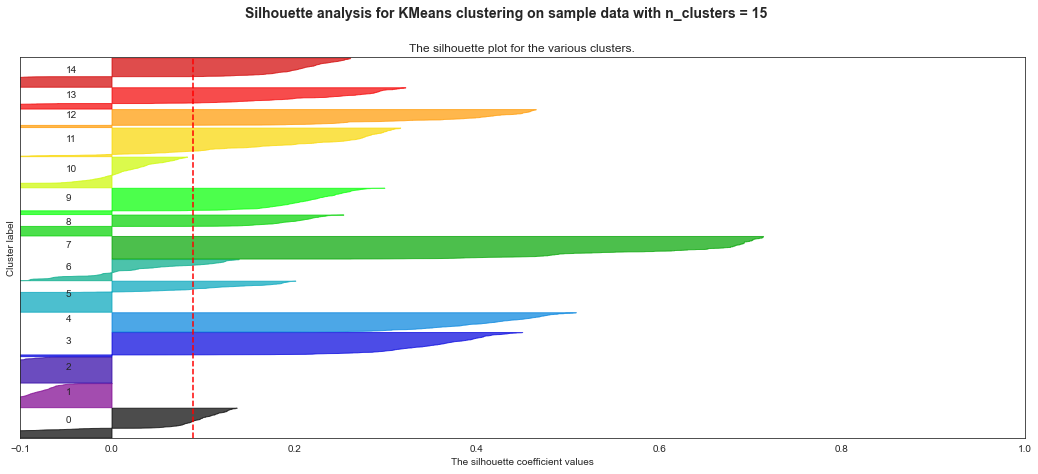

In [174]:

for n_clusters in range(2,16):
    
    fig, ax1 = plt.subplots(figsize = (15,5))
    fig.set_size_inches(18, 7)

   
    ax1.set_xlim([-0.1, 1])
   
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

  
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3_reduced)

   
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

===========================================================================================================================

# Clustering (K-MEANS)

In [186]:
cluster = KMeans(n_clusters=7, random_state= 44 )
kmeans_predictions = cluster.fit_predict(df3_reduced)

In [187]:
pd.value_counts(kmeans_predictions)

5    1352
4    1275
6    1264
1    1150
2    1086
3     990
0     951
dtype: int64

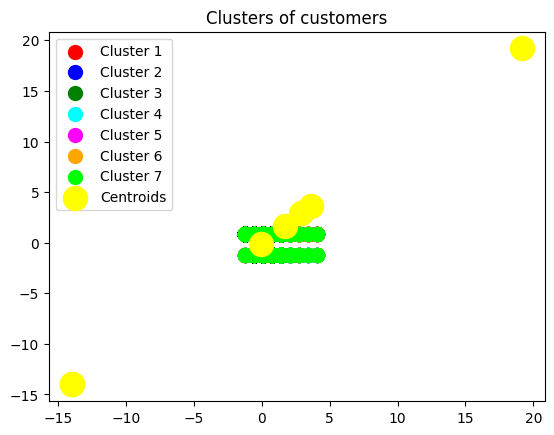

In [189]:
with plt.style.context('default'):
    plt.scatter(df3[kmeans_predictions == 0, 2], df3[kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(df3[kmeans_predictions == 1, 2], df3[kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(df3[kmeans_predictions == 2, 2], df3[kmeans_predictions == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(df3[kmeans_predictions == 3, 2], df3[kmeans_predictions == 3, -1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(df3[kmeans_predictions == 4, 2], df3[kmeans_predictions == 4, -1], s = 100, c = 'magenta', label = 'Cluster 5')
    plt.scatter(df3[kmeans_predictions == 5, 2], df3[kmeans_predictions == 5, -1], s = 100, c = 'orange', label = 'Cluster 6')
    plt.scatter(df3[kmeans_predictions == 6, 2], df3[kmeans_predictions == 6, -1], s = 100, c = 'lime', label = 'Cluster 7')
    plt.scatter(cluster.cluster_centers_[:, 2], cluster.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
    plt.title('Clusters of customers')
   
    plt.legend()
    plt.show()


## 2D was not good enough for visualization

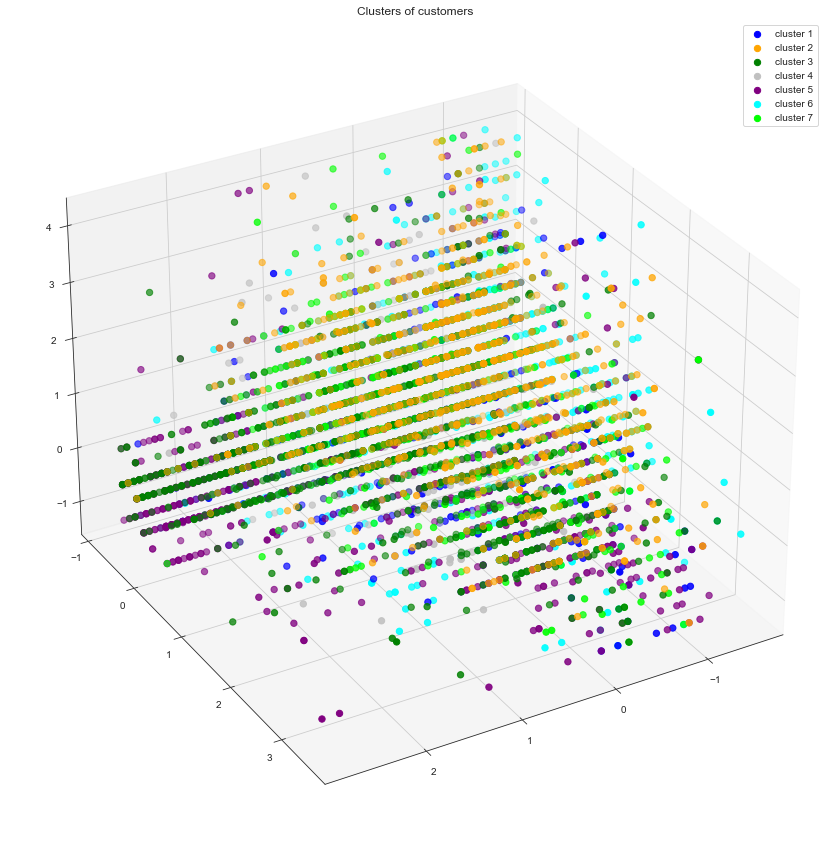

In [191]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3[kmeans_predictions == 0,0],df3[kmeans_predictions == 0,1],df3[kmeans_predictions == 0,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(df3[kmeans_predictions == 1,0],df3[kmeans_predictions == 1,1],df3[kmeans_predictions == 1,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(df3[kmeans_predictions == 2,0],df3[kmeans_predictions == 2,1],df3[kmeans_predictions == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(df3[kmeans_predictions == 3,0],df3[kmeans_predictions == 3,1],df3[kmeans_predictions == 3,2], s = 40 , color = 'silver', label = "cluster 4")
ax.scatter(df3[kmeans_predictions == 4,0],df3[kmeans_predictions == 4,1],df3[kmeans_predictions == 4,2], s = 40 , color = 'purple', label = "cluster 5")
ax.scatter(df3[kmeans_predictions == 5,0],df3[kmeans_predictions == 5,1],df3[kmeans_predictions == 5,2], s = 40 , color = 'aqua', label = "cluster 6")
ax.scatter(df3[kmeans_predictions == 6,0],df3[kmeans_predictions == 6,1],df3[kmeans_predictions == 6,2], s = 40 , color = 'lime', label = "cluster 7")
ax.legend()
ax.view_init(30, 60)
plt.title('Clusters of customers')
plt.show()

=========================================================================================================================

# Model Evaluation (K-MEANS)

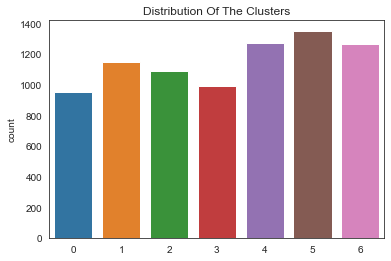

In [192]:
pl = sns.countplot(x= kmeans_predictions)
pl.set_title("Distribution Of The Clusters")
plt.show()

c:\Users\omara\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

98.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\omara\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\omara\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

93.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



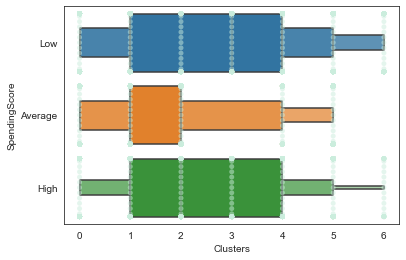

In [206]:
plt.figure()
pl=sns.swarmplot(x=df2['Clusters'], y=df2["SpendingScore"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df2['Clusters'], y=df2["SpendingScore"])
plt.show()

===========================================================================================================================

# Clustering (AgglomerativeClustering) 

In [194]:
cluster2 = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
kmeans_predictions2 = cluster2.fit_predict(df3_reduced)

In [195]:
pd.value_counts(kmeans_predictions2)

1    1719
2    1437
0    1388
4    1147
3    1080
5     786
6     511
dtype: int64

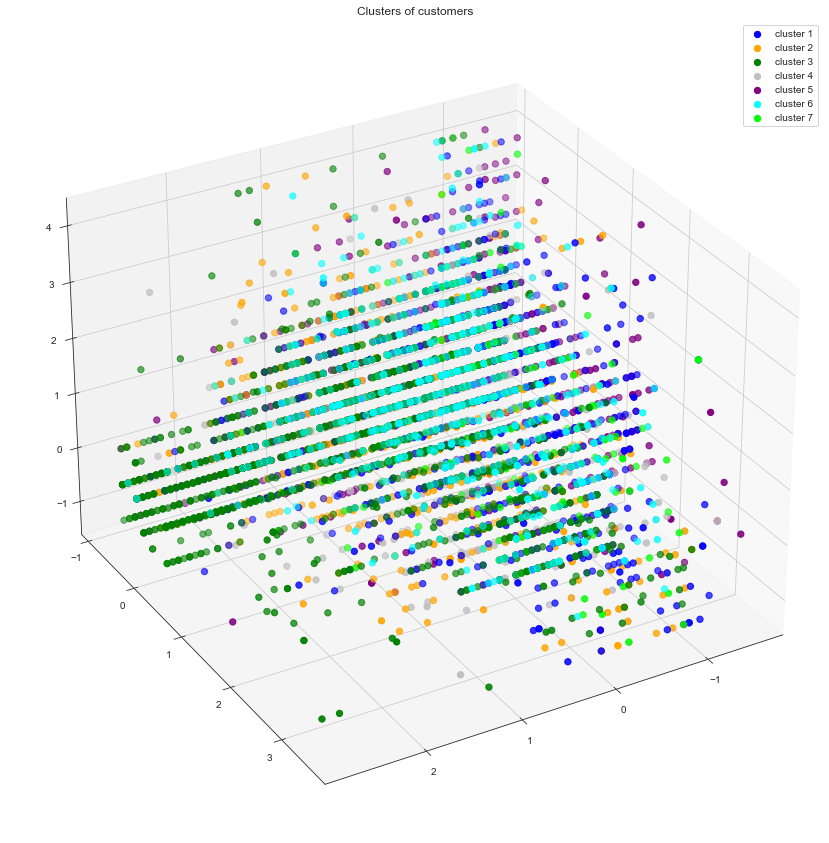

In [196]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3[kmeans_predictions2 == 0,0],df3[kmeans_predictions2== 0,1],df3[kmeans_predictions2== 0,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(df3[kmeans_predictions2== 1,0],df3[kmeans_predictions2== 1,1],df3[kmeans_predictions2== 1,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(df3[kmeans_predictions2== 2,0],df3[kmeans_predictions2== 2,1],df3[kmeans_predictions2== 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(df3[kmeans_predictions2== 3,0],df3[kmeans_predictions2== 3,1],df3[kmeans_predictions2== 3,2], s = 40 , color = 'silver', label = "cluster 4")
ax.scatter(df3[kmeans_predictions2== 4,0],df3[kmeans_predictions2== 4,1],df3[kmeans_predictions2== 4,2], s = 40 , color = 'purple', label = "cluster 5")
ax.scatter(df3[kmeans_predictions2== 5,0],df3[kmeans_predictions2== 5,1],df3[kmeans_predictions2== 5,2], s = 40 , color = 'aqua', label = "cluster 6")
ax.scatter(df3[kmeans_predictions2== 6,0],df3[kmeans_predictions2== 6,1],df3[kmeans_predictions2== 6,2], s = 40 , color = 'lime', label = "cluster 7")

ax.legend()
ax.view_init(30, 60)
plt.title('Clusters of customers')
plt.show()

In [197]:
df2['Clusters'] = kmeans_predictions2

==================================================================================================================

# Model Evaluation (AgglomerativeClustering) 

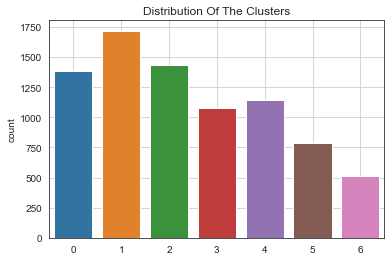

In [199]:
pl = sns.countplot(x= kmeans_predictions2)
pl.set_title("Distribution Of The Clusters")
plt.grid()
plt.show()

c:\Users\omara\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

98.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\omara\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\omara\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

93.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



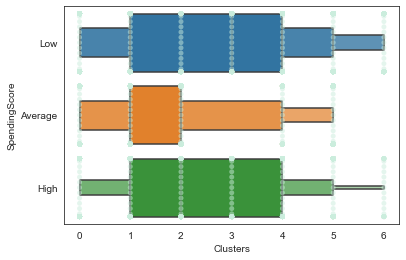

In [201]:
plt.figure()
pl=sns.swarmplot(x=df2['Clusters'], y=df2["SpendingScore"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df2['Clusters'], y=df2["SpendingScore"])
plt.show()

============================================================================================================================

# Data after being Clustered 

In [207]:
df2

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Clusters
0,Male,No,22,No,Healthcare,1.0,Low,4.0,4
1,Female,Yes,38,Yes,Engineer,3.0,Average,3.0,5
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,3
4,Female,Yes,40,Yes,Entertainment,3.0,High,6.0,0
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.0,Low,7.0,3
8064,Male,No,35,No,Executive,3.0,Low,4.0,3
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,5
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,5


======================================================================================================================

# Exporting Data 

In [209]:
df2.to_csv(r'D:\CustomerSegmentation.csv')

======================================================================================================================